# Image save by CNN models
Images were saved in these directory:

Normal images:
#### 'F:\HAB_2\PrinzScreen\training_classfication\raw\pheno\SC_notcetgroize'
Phenotype cells - peroxisome not appearing:
#### 'F:\HAB_2\PrinzScreen\training_classfication\raw\pheno\SC_notcetgroize\pheno'
---

In [1]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mpl
from urllib.parse import urlparse
from cellpose import models, core
use_GPU = core.use_gpu()
print('>>> GPU activated? %d'%use_GPU)
# call logger_setup to have output of cellpose written
import tqdm as tqdm
from cellpose.io import logger_setup
from cellpose import utils
import tensorflow as tf
from tensorflow import keras
import glob
import pandas as pd
import re
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from PIL import Image, ImageEnhance, ImageDraw,ImageFont
from skimage import io, filters, measure, color, img_as_ubyte

F:\Gil\anaconda\envs\cellpose\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


>>> GPU activated? 1


In [2]:
os.chdir('F:\\HAB_2\\PrinzScreen\\training_classfication')
from utils import AIPS_cellpose as AC
from utils import AIPS_file_display as AFD

F:\HAB_2\PrinzScreen\training_classfication\utils\display_and_xml.py:32: UserWarning: viewer requires Qt
  from skimage.viewer import ImageViewer


 Save files with the prediction on file name and also overlay
 ## Load model:
 

In [10]:
path_bayes_model = r'F:\HAB_2\PrinzScreen\training_classfication\models\imbalance'
os.chdir(path_bayes_model)
os.listdir()

['cnn_transfer_learning_Augmentation_drop_layer_4and5.h5',
 'cnn_transfer_learning_Augmentation_drop_layer_4and5_10p.h5',
 'cnn_transfer_learning_Augmentation_drop_layer_4and5_10p_cp.h5',
 'cnn_transfer_learning_Augmentation_drop_layer_4and5_20p.h5',
 'flat_proir.pkl',
 'flat_proir_condansed.pkl',
 'lr.pkl',
 'shrinking_priors.pkl']

In [11]:
model_cnn = load_model('cnn_transfer_learning_Augmentation_drop_layer_4and5.h5')
model_cnn10 = load_model('cnn_transfer_learning_Augmentation_drop_layer_4and5_10p.h5')
model_cnn20 = load_model('cnn_transfer_learning_Augmentation_drop_layer_4and5_20p.h5')
model_cnn10p = load_model('cnn_transfer_learning_Augmentation_drop_layer_4and5_10p_cp.h5')
model_list= [model_cnn,model_cnn10,model_cnn20,model_cnn10p]
model_names = ['model_cnn', 'model_cnn10', 'model_cnn20', 'model_cnn10p']

Files are loaded and predicted using the model

In [5]:
def predict_model(model,image_name,image_path):
    test_imgs = img_to_array(load_img(os.path.join(image_path,image_name), target_size=(150, 150)))
    test_imgs = np.array(test_imgs)
    # test_imgs_scaled = test_imgs.astype('float32')
    test_imgs_scaled = test_imgs
    test_imgs_scaled /= 255
    pred = model_cnn.predict(test_imgs_scaled.reshape(1, 150, 150, 3),verbose=0).tolist()[0][0]
    return pred,test_imgs

Mixture of positive and negative images

In [6]:
path_norm  = r'F:\HAB_2\PrinzScreen\training_classfication\raw\pheno\SC_notcetgroize'
path_pheno = r'F:\HAB_2\PrinzScreen\training_classfication\raw\pheno\SC_notcetgroize\pheno'
os.chdir(path_norm)
norm_files = glob.glob('*')
os.chdir(path_pheno)
pheno_files = glob.glob('*')

In [7]:
import random

Image iteration and display

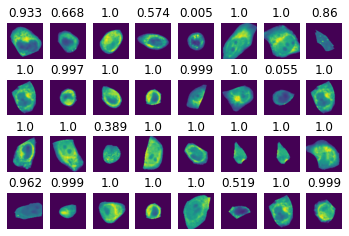

In [15]:
rows=4
for i in range(32):
    random.shuffle(pheno_files)
    pred_temp,img = predict_model(model_cnn,pheno_files[0],path_pheno)
    plt.subplot(rows,8,i+1)
    plt.title(str(np.round(pred_temp,3)))
    plt.axis('off')
    plt.imshow(img)

### Example of phenotype (no peroxisome):

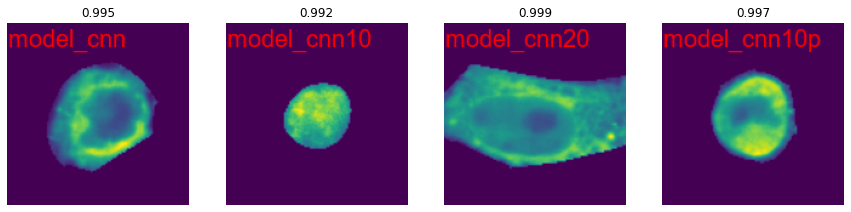

In [32]:
import PIL
os.chdir(path_pheno)
rows=2
plt.figure(figsize=(15, 12))
for i in range(4):
    random.shuffle(pheno_files)
    pred_temp,img = predict_model(model_list[i],pheno_files[0],path_pheno)
    PIL_image = PIL.Image.open(pheno_files[0])
    draw = ImageDraw.Draw(PIL_image)
    font = ImageFont.truetype("arial.ttf", 20, encoding="unic")
    draw.text((1,1), str(model_names[i]), 'red', font=font)
    plt.subplot(1,4,i+1)
    plt.title(str(np.round(pred_temp,3)))
    plt.axis('off')
    plt.imshow(PIL_image,cmap='gray')


### Example of normal (peroxisome):


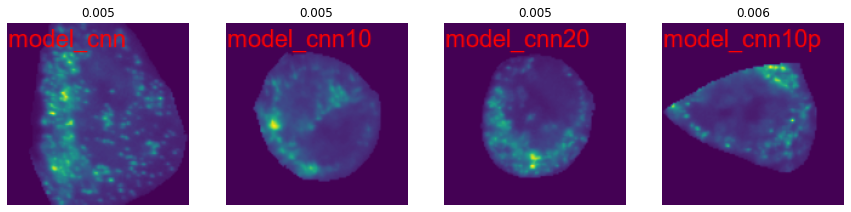

In [24]:
import PIL
os.chdir(path_norm)
rows=2
plt.figure(figsize=(15, 12))
for i in range(4):
    random.shuffle(norm_files)
    pred_temp,img = predict_model(model_list[i],norm_files[0],path_norm)
    PIL_image = PIL.Image.open(norm_files[0])
    draw = ImageDraw.Draw(PIL_image)
    font = ImageFont.truetype("arial.ttf", 20, encoding="unic")
    draw.text((1,1), str(model_names[i]), 'red', font=font)
    plt.subplot(1,4,i+1)
    plt.title(str(np.round(pred_temp,3)))
    plt.axis('off')
    plt.imshow(PIL_image)

In [23]:
plt.subplot(1,4,figsize = (5))
plt.title(str(np.round(pred_temp,3)))
plt.axis('off')
plt.imshow(PIL_image)

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 432x288 with 0 Axes>